<a href="https://colab.research.google.com/github/Pranov1984/Digit-Recognition-in-photographs/blob/master/Digit_Recognition_SVNH_UsingKeras_HypTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It was seen (in the other jupyter notebook uploaded) that KNN is not doing very well with classification of images and it is taking a lot of time for the algorithm to run and classify.

In order for a robot or a computer to perform tasks, it must recognize what it is looking at. Given an image a computer must be able to classify what the image represents. While this is a fairly simple task for humans, it is not an easy task for computers. Computers must go through a series of steps in order to classify a single image.

Object recognition is challenging for several reasons. The first and most obvious reason is that there are about 10,000 to 30,000 different object categories. The second reason is the viewpoint variation where many objects can look different from different angles. The third reason is illumination in which lighting makes the same objects look like different objects. The fourth reason is background clutter in which the classifier cannot distinguish the object from its background. Other challenges include scale deformation, occlusion, and intra-class variation. Hence classical algorithms like KNN don't do well.

Deep Learning uses forward and backward propagation to be able to handle these challenges. The ability of the neural networks to compare the predicted with the actual and then use the difference or loss to send signal backwards (into the netork) for parameters to be adjusted helps to give better results.

Here we the accuracy was seen to improve gradually we introduced non-linearity, batchnormalization, drop out and data augmentation. When convolution networks were added to the mix, the best scores were achieved. We achieved an accuracy of 91%.

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import the data
import h5py
import numpy as np

ds=h5py.File('/content/drive/My Drive/Colab Notebooks/AIML/ANN/Project SVNH - NN & DL/SVHN_single_grey1.h5','r')

X_train = ds['X_train'][:]
y_train = ds['y_train'][:]
X_test = ds['X_test'][:]
y_test = ds['y_test'][:]

# Close this file
ds.close()

In [0]:
X_train.shape , X_test.shape

((42000, 32, 32), (18000, 32, 32))

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


(-0.5, 31.5, 31.5, -0.5)

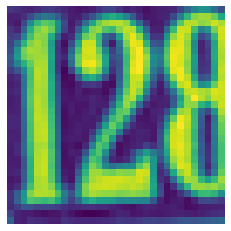

In [0]:
# visualizing the data
plt.imshow(X_train[0])
plt.axis('off')

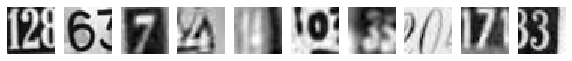

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [0]:
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

In [0]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [0]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=1, test_size=0.2)

In [0]:
X_train.shape, X_test.shape, X_val.shape, y_test.shape, y_train.shape, y_val.shape

((33600, 1024),
 (18000, 1024),
 (8400, 1024),
 (18000, 10),
 (33600, 10),
 (8400, 10))

In [0]:
#Normalize the data

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

Build a Basic NN

In [0]:
from keras.layers import Activation, Dense
from keras import optimizers

In [0]:
model = Sequential()

In [0]:
model.add(Dense(50,input_shape=(1024,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
fit=model.fit(X_train, y_train, batch_size=200, epochs=100, verbose=1,  validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33600 samples, validate on 18000 samples
Epoch 1/100





33600/33600 [==============================] - 10s 309us/step - loss: 2.3397 - acc: 0.0983 - val_loss: 2.3037 - val_acc: 0.1008
Epoch 2/100
33600/33600 [==============================] - 1s 21us/step - loss: 2.3032 - acc: 0.1006 - val_loss: 2.3030 - val_acc: 0.1019
Epoch 3/100
33600/33600 [==============================] - 1s 19us/step - loss: 2.3030 - acc: 0.1005 - val_loss: 2.3030 - val_acc: 0.0998
Epoch 4/100
33600/33600 [==============================] - 1s 20us/step - loss: 2.3030 - acc: 0.1008 - val_loss: 2.3031 - val_acc: 0.1012
Epoch 5/100
33600/33600 [==============================] - 1s 20us/step - loss: 2.3029 - acc: 0.1028 - val_loss: 2.3030 - val_acc: 0.1041
Epoch 6/100
33600/33600 [==============================] - 1s 20us/step - loss: 2.3030 - acc: 0.1003 - val_loss: 2.3029 - val_acc: 0.1039
Epoch 7/100
33600/

In [0]:
results=model.evaluate(X_val, y_val)

8400/8400 [==============================] - 0s 36us/step


In [0]:
print('Accuracy:',results[1])

Accuracy: 0.115


Enhance the model with weight initialization, nonlinearity, regularization with drop outs

In [0]:
# define a function for training and printing results from evaluation on test set

def mlp_model():
  model = Sequential()
  model.add(Dense(100,input_shape=(1024,), kernel_initializer='he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(100,kernel_initializer='he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(100, kernel_initializer='he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(100, kernel_initializer='he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(10, kernel_initializer='he_normal'))
  model.add(Activation('softmax'))

  sgd=optimizers.SGD(lr=0.001)
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [0]:
model=mlp_model()
history=model.fit(X_train,y_train, batch_size=500, epochs=100, verbose=1,  validation_data=(X_test, y_test))


Train on 33600 samples, validate on 18000 samples
Epoch 1/100
33600/33600 [==============================] - 1s 18us/step - loss: 2.4312 - acc: 0.1001 - val_loss: 2.4105 - val_acc: 0.1016
Epoch 2/100
33600/33600 [==============================] - 0s 12us/step - loss: 2.3964 - acc: 0.1001 - val_loss: 2.3825 - val_acc: 0.1016
Epoch 3/100
33600/33600 [==============================] - 0s 11us/step - loss: 2.3723 - acc: 0.1001 - val_loss: 2.3626 - val_acc: 0.1016
Epoch 4/100
33600/33600 [==============================] - 0s 12us/step - loss: 2.3548 - acc: 0.1001 - val_loss: 2.3475 - val_acc: 0.1016
Epoch 5/100
33600/33600 [==============================] - 0s 11us/step - loss: 2.3415 - acc: 0.1001 - val_loss: 2.3361 - val_acc: 0.1016
Epoch 6/100
33600/33600 [==============================] - 0s 11us/step - loss: 2.3314 - acc: 0.1001 - val_loss: 2.3273 - val_acc: 0.1016
Epoch 7/100
33600/33600 [==============================] - 0s 13us/step - loss: 2.3236 - acc: 0.1001 - val_loss: 2.3207 -

In [0]:
results=model.evaluate(X_val,y_val)

8400/8400 [==============================] - 0s 39us/step


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.09297619047619048


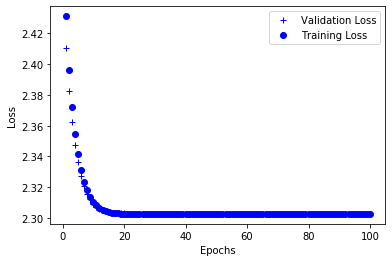

In [0]:
NN_val_loss = history.history['val_loss']
NN_train_loss = history.history['loss']
epochs = range(1,101)

plt.plot(epochs, NN_val_loss, 'b+', label='Validation Loss')
plt.plot(epochs, NN_train_loss, 'bo', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
#Same rate of decrease in loss for both training and validation and both of them are underfitting

# Add advance non linearity through relu and increase the batchsize plus the epochs

In [0]:
def mlp_model():
  model = Sequential()
  model.add(Dense(50,input_shape=(1024,), kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dense(50,kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dense(50, kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dense(50, kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dense(10, kernel_initializer='he_normal'))
  model.add(Activation('softmax'))

  sgd=optimizers.SGD(lr=0.001)
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048,epochs = 500, verbose = 1,  validation_data=(X_test, y_test))

Train on 33600 samples, validate on 18000 samples
Epoch 1/500
33600/33600 [==============================] - 1s 18us/step - loss: 2.3766 - acc: 0.1125 - val_loss: 2.3610 - val_acc: 0.1134
Epoch 2/500
33600/33600 [==============================] - 0s 5us/step - loss: 2.3478 - acc: 0.1161 - val_loss: 2.3425 - val_acc: 0.1142
Epoch 3/500
33600/33600 [==============================] - 0s 5us/step - loss: 2.3339 - acc: 0.1160 - val_loss: 2.3322 - val_acc: 0.1142
Epoch 4/500
33600/33600 [==============================] - 0s 5us/step - loss: 2.3260 - acc: 0.1149 - val_loss: 2.3262 - val_acc: 0.1137
Epoch 5/500
33600/33600 [==============================] - 0s 5us/step - loss: 2.3211 - acc: 0.1134 - val_loss: 2.3223 - val_acc: 0.1124
Epoch 6/500
33600/33600 [==============================] - 0s 5us/step - loss: 2.3179 - acc: 0.1132 - val_loss: 2.3195 - val_acc: 0.1093
Epoch 7/500
33600/33600 [==============================] - 0s 5us/step - loss: 2.3156 - acc: 0.1118 - val_loss: 2.3174 - val_ac

In [0]:
results=model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 0s 41us/step
Test accuracy:  0.2779761904761905


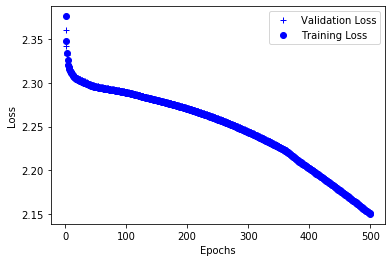

In [0]:
NN3_val_loss = history.history['val_loss']
NN3_train_loss = history.history['loss']
epochs = range(1,501)

plt.plot(epochs, NN3_val_loss, 'b+', label='Validation Loss')
plt.plot(epochs, NN3_train_loss, 'bo', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
from keras.layers import BatchNormalization, Dropout

In [0]:
def mlp_model():
  model = Sequential()
  model.add(Dense(50,input_shape=(1024,), kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50,kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(10, kernel_initializer='he_normal'))
  model.add(Activation('softmax'))

  adam=optimizers.adam(lr=0.01)
  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=2048,epochs = 500, verbose = 1,  validation_data=(X_test, y_test))


Train on 33600 samples, validate on 18000 samples
Epoch 1/500
33600/33600 [==============================] - 1s 37us/step - loss: 2.1605 - acc: 0.2221 - val_loss: 2.0355 - val_acc: 0.2943
Epoch 2/500
33600/33600 [==============================] - 0s 8us/step - loss: 1.5282 - acc: 0.4797 - val_loss: 2.0606 - val_acc: 0.3534
Epoch 3/500
33600/33600 [==============================] - 0s 9us/step - loss: 1.2009 - acc: 0.6093 - val_loss: 1.7046 - val_acc: 0.4659
Epoch 4/500
33600/33600 [==============================] - 0s 9us/step - loss: 1.0376 - acc: 0.6671 - val_loss: 1.5014 - val_acc: 0.5331
Epoch 5/500
33600/33600 [==============================] - 0s 9us/step - loss: 0.9438 - acc: 0.7000 - val_loss: 1.6171 - val_acc: 0.5072
Epoch 6/500
33600/33600 [==============================] - 0s 8us/step - loss: 0.8813 - acc: 0.7221 - val_loss: 1.5107 - val_acc: 0.5156
Epoch 7/500
33600/33600 [==============================] - 0s 9us/step - loss: 0.8174 - acc: 0.7423 - val_loss: 1.4591 - val_a

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 0s 59us/step
Test accuracy:  0.7567857142857143


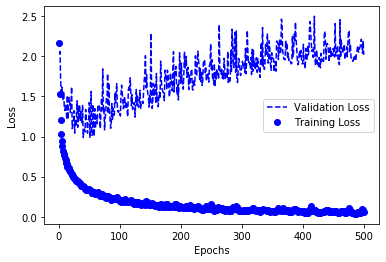

In [0]:
NN4_val_loss = history.history['val_loss']
NN4_train_loss = history.history['loss']
NN4_val_acc = history.history['val_acc']
NN4_train_acc = history.history['acc']


epochs = range(1,501)


plt.plot(epochs, NN4_val_loss, 'b--', label='Validation Loss')
plt.plot(epochs, NN4_train_loss, 'bo', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Overfitting is seen from around 60th epoch as can be seen from both the acc and loss comparisons

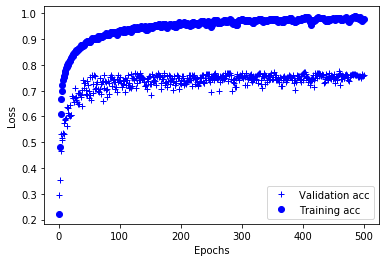

In [0]:

plt.plot(epochs, NN4_val_acc, 'b+', label='Validation acc')
plt.plot(epochs, NN4_train_acc, 'bo', label='Training acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Add Drop out

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 300, verbose = 1,  validation_data=(X_test, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 33600 samples, validate on 18000 samples
Epoch 1/300
33600/33600 [==============================] - 2s 46us/step - loss: 2.4303 - acc: 0.1153 - val_loss: 2.3520 - val_acc: 0.1224
Epoch 2/300
33600/33600 [==============================] - 0s 9us/step - loss: 2.1989 - acc: 0.1809 - val_loss: 2.1269 - val_acc: 0.2316
Epoch 3/300
33600/33600 [==============================] - 0s 9us/step - loss: 1.9677 - acc: 0.2745 - val_loss: 2.1835 - val_acc: 0.2514
Epoch 4/300
33600/33600 [==============================] - 0s 8us/step - loss: 1.7996 - acc: 0.3439 - val_loss: 2.0222 - val_acc: 0.2803
Epoch 5/300
33600/33600 [==============================] - 0s 9us/step - loss: 1.6676 - acc: 0.3995 - val_loss: 1.7606 - val_acc: 0.3867
Epoch 6/300
33600/33600 [==============================] - 0s 9us/step - loss: 1.5750 - acc: 0.4393 - val_loss: 1.5608 - val_acc: 0.4584
Epoch 7/300


In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 0s 58us/step
Test accuracy:  0.7908333333333334


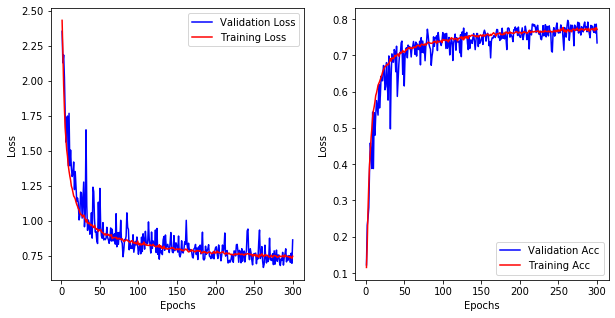

In [0]:
NN5_val_loss = history.history['val_loss']
NN5_train_loss = history.history['loss']
NN5_val_acc = history.history['val_acc']
NN5_train_acc = history.history['acc']


epochs = range(1,301)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, NN5_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, NN5_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, NN5_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, NN5_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Overfitting is reduced to a great extent. However the validation graphs are a little fluctuating and there is probably opportunity to improve the test (unseen) accuracy score from 79% to higher

In [0]:
NN5_test_acc= 0.7908

We need to try hyperparameter optimization to arrive at the best values and then use it to ge the best results

# Let's start with two hidden layers and increased neurons in the hidden layers

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.0001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 100, verbose = 1,  validation_data=(X_test, y_test))

Train on 33600 samples, validate on 18000 samples
Epoch 1/100
33600/33600 [==============================] - 1s 40us/step - loss: 2.6808 - acc: 0.1090 - val_loss: 2.5072 - val_acc: 0.1206
Epoch 2/100
33600/33600 [==============================] - 0s 7us/step - loss: 2.5197 - acc: 0.1298 - val_loss: 2.3907 - val_acc: 0.1419
Epoch 3/100
33600/33600 [==============================] - 0s 8us/step - loss: 2.4094 - acc: 0.1512 - val_loss: 2.2887 - val_acc: 0.1609
Epoch 4/100
33600/33600 [==============================] - 0s 8us/step - loss: 2.3005 - acc: 0.1810 - val_loss: 2.1828 - val_acc: 0.2101
Epoch 5/100
33600/33600 [==============================] - 0s 7us/step - loss: 2.2134 - acc: 0.2153 - val_loss: 2.1261 - val_acc: 0.2526
Epoch 6/100
33600/33600 [==============================] - 0s 7us/step - loss: 2.1287 - acc: 0.2473 - val_loss: 2.0989 - val_acc: 0.2534
Epoch 7/100
33600/33600 [==============================] - 0s 8us/step - loss: 2.0387 - acc: 0.2884 - val_loss: 2.0203 - val_ac

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 0s 50us/step
Test accuracy:  0.7975


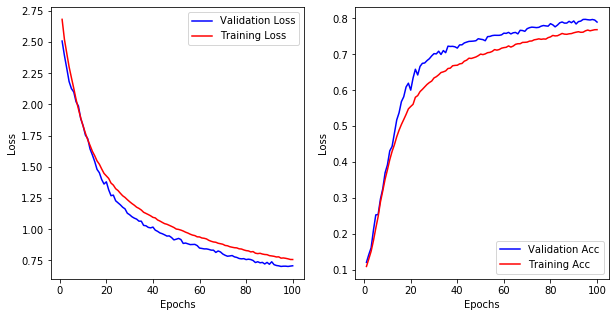

In [0]:
NN6_test_acc=0.7975
NN6_val_loss = history.history['val_loss']
NN6_train_loss = history.history['loss']
NN6_val_acc = history.history['val_acc']
NN6_train_acc = history.history['acc']


epochs = range(1,101)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, NN6_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, NN6_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, NN6_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, NN6_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Not much overfitting but not much improvement in the accuracy

In [0]:
# Let's reduce the drop out to 0.1
def mlp_model():
    model = Sequential()
    
    model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.1))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 100, verbose = 1, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 18000 samples
Epoch 1/100
33600/33600 [==============================] - 1s 44us/step - loss: 2.3131 - acc: 0.1964 - val_loss: 2.3298 - val_acc: 0.1952
Epoch 2/100
33600/33600 [==============================] - 0s 8us/step - loss: 1.7488 - acc: 0.4233 - val_loss: 2.0509 - val_acc: 0.2911
Epoch 3/100
33600/33600 [==============================] - 0s 8us/step - loss: 1.4178 - acc: 0.5682 - val_loss: 1.6302 - val_acc: 0.4433
Epoch 4/100
33600/33600 [==============================] - 0s 7us/step - loss: 1.2146 - acc: 0.6398 - val_loss: 1.5582 - val_acc: 0.4898
Epoch 5/100
33600/33600 [==============================] - 0s 8us/step - loss: 1.0960 - acc: 0.6751 - val_loss: 1.5217 - val_acc: 0.4915
Epoch 6/100
33600/33600 [==============================] - 0s 7us/step - loss: 1.0138 - acc: 0.6971 - val_loss: 1.3505 - val_acc: 0.5610
Epoch 7/100
33600/33600 [==============================] - 0s 8us/step - loss: 0.9558 - acc: 0.7142 - val_loss: 1.2464 - val_ac

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 0s 56us/step
Test accuracy:  0.8073809523809524


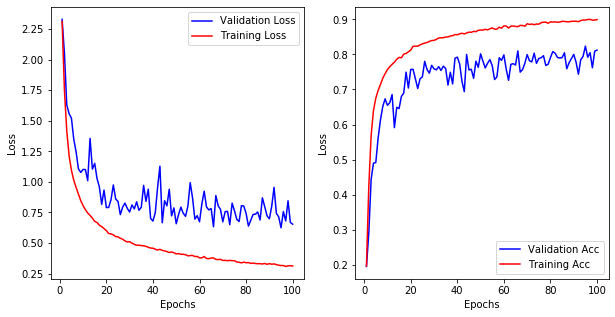

In [0]:
NN6_test_acc=0.8073
NN6_val_loss = history.history['val_loss']
NN6_train_loss = history.history['loss']
NN6_val_acc = history.history['val_acc']
NN6_train_acc = history.history['acc']


epochs = range(1,101)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, NN6_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, NN6_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, NN6_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, NN6_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

There is a little bit of overfitting as can be seen above. However the accuracy on unseen data has gone up by a small margin.

In [0]:
# Let's increase the nodes in the hidden layer and increase drop out
def mlp_model():
    model = Sequential()
    
    model.add(Dense(248, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(248, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 200, verbose = 1, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 18000 samples
Epoch 1/200
33600/33600 [==============================] - 2s 48us/step - loss: 2.4538 - acc: 0.1627 - val_loss: 2.1505 - val_acc: 0.2402
Epoch 2/200
33600/33600 [==============================] - 0s 8us/step - loss: 1.8854 - acc: 0.3537 - val_loss: 2.0947 - val_acc: 0.2933
Epoch 3/200
33600/33600 [==============================] - 0s 8us/step - loss: 1.5165 - acc: 0.4960 - val_loss: 1.7049 - val_acc: 0.4157
Epoch 4/200
33600/33600 [==============================] - 0s 7us/step - loss: 1.2971 - acc: 0.5815 - val_loss: 1.4829 - val_acc: 0.4941
Epoch 5/200
33600/33600 [==============================] - 0s 8us/step - loss: 1.1596 - acc: 0.6335 - val_loss: 1.3911 - val_acc: 0.5312
Epoch 6/200
33600/33600 [==============================] - 0s 8us/step - loss: 1.0795 - acc: 0.6606 - val_loss: 1.3867 - val_acc: 0.5438
Epoch 7/200
33600/33600 [==============================] - 0s 8us/step - loss: 1.0177 - acc: 0.6819 - val_loss: 1.2971 - val_ac

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 0s 58us/step
Test accuracy:  0.8201190476190476


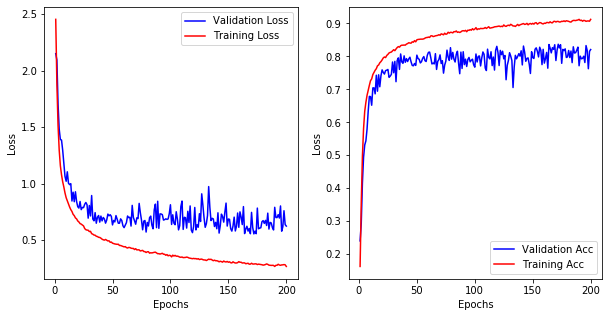

In [0]:
NN7_test_acc=0.82011
NN7_val_loss = history.history['val_loss']
NN7_train_loss = history.history['loss']
NN7_val_acc = history.history['val_acc']
NN7_train_acc = history.history['acc']


epochs = range(1,201)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, NN7_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, NN7_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, NN7_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, NN7_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Test accuracy improved. A small amount of overfitting is still seen but not too much to be worried. Further finetuning to see if accuracy can be improved

In [0]:
# Let's increase the nodes in the hidden layer
def mlp_model():
    model = Sequential()
    
    model.add(Dense(248*2, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(248*2, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 200, verbose = 1, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 18000 samples
Epoch 1/200
33600/33600 [==============================] - 2s 59us/step - loss: 2.3244 - acc: 0.2242 - val_loss: 2.3511 - val_acc: 0.2321
Epoch 2/200
33600/33600 [==============================] - 0s 9us/step - loss: 1.6101 - acc: 0.4607 - val_loss: 1.7445 - val_acc: 0.3904
Epoch 3/200
33600/33600 [==============================] - 0s 8us/step - loss: 1.2610 - acc: 0.5931 - val_loss: 1.5503 - val_acc: 0.4767
Epoch 4/200
33600/33600 [==============================] - 0s 8us/step - loss: 1.0913 - acc: 0.6551 - val_loss: 1.3804 - val_acc: 0.5483
Epoch 5/200
33600/33600 [==============================] - 0s 8us/step - loss: 0.9870 - acc: 0.6901 - val_loss: 1.3661 - val_acc: 0.5634
Epoch 6/200
33600/33600 [==============================] - 0s 8us/step - loss: 0.9133 - acc: 0.7153 - val_loss: 1.4443 - val_acc: 0.5245
Epoch 7/200
33600/33600 [==============================] - 0s 8us/step - loss: 0.8626 - acc: 0.7326 - val_loss: 1.0689 - val_ac

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 0s 56us/step
Test accuracy:  0.8028571428571428


In [0]:
NN8_test_acc=0.8028
NN8_val_loss = history.history['val_loss']
NN8_train_loss = history.history['loss']
NN8_val_acc = history.history['val_acc']
NN8_train_acc = history.history['acc']


epochs = range(1,201)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, NN8_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, NN8_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, NN8_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, NN8_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [0]:
# Let's add a new layer & increase the nodes in the hidden layer
def mlp_model():
    model = Sequential()
    
    model.add(Dense(248*3, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(248*3, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.3))
    model.add(Dense(248*3, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 100, verbose = 1, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 18000 samples
Epoch 1/100
33600/33600 [==============================] - 2s 74us/step - loss: 2.2660 - acc: 0.2377 - val_loss: 2.1612 - val_acc: 0.2847
Epoch 2/100
33600/33600 [==============================] - 0s 11us/step - loss: 1.5115 - acc: 0.4903 - val_loss: 1.6673 - val_acc: 0.4521
Epoch 3/100
33600/33600 [==============================] - 0s 12us/step - loss: 1.1796 - acc: 0.6159 - val_loss: 1.7126 - val_acc: 0.4554
Epoch 4/100
33600/33600 [==============================] - 0s 11us/step - loss: 1.0263 - acc: 0.6720 - val_loss: 1.4154 - val_acc: 0.5418
Epoch 5/100
33600/33600 [==============================] - 0s 11us/step - loss: 0.9269 - acc: 0.7054 - val_loss: 1.3341 - val_acc: 0.5721
Epoch 6/100
33600/33600 [==============================] - 0s 11us/step - loss: 0.8580 - acc: 0.7275 - val_loss: 1.3500 - val_acc: 0.5626
Epoch 7/100
33600/33600 [==============================] - 0s 11us/step - loss: 0.7968 - acc: 0.7471 - val_loss: 1.0086 - 

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 1s 67us/step
Test accuracy:  0.8247619047619048


In [0]:
# Let's increase the drop out rate since there was no increase in performance
def mlp_model():
    model = Sequential()
    
    model.add(Dense(248*3, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(248*3, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.3))
    model.add(Dense(248*3, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 200, verbose = 1, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 18000 samples
Epoch 1/200
33600/33600 [==============================] - 4s 105us/step - loss: 2.2504 - acc: 0.2415 - val_loss: 2.0561 - val_acc: 0.3013
Epoch 2/200
33600/33600 [==============================] - 0s 10us/step - loss: 1.4931 - acc: 0.4922 - val_loss: 1.8531 - val_acc: 0.4102
Epoch 3/200
33600/33600 [==============================] - 0s 10us/step - loss: 1.1701 - acc: 0.6187 - val_loss: 1.4467 - val_acc: 0.5362
Epoch 4/200
33600/33600 [==============================] - 0s 10us/step - loss: 1.0173 - acc: 0.6736 - val_loss: 1.2948 - val_acc: 0.5811
Epoch 5/200
33600/33600 [==============================] - 0s 9us/step - loss: 0.9197 - acc: 0.7074 - val_loss: 1.3959 - val_acc: 0.5730
Epoch 6/200
33600/33600 [==============================] - 0s 10us/step - loss: 0.8508 - acc: 0.7281 - val_loss: 1.4381 - val_acc: 0.5505
Epoch 7/200
33600/33600 [==============================] - 0s 9us/step - loss: 0.8004 - acc: 0.7449 - val_loss: 1.1790 - v

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 1s 65us/step
Test accuracy:  0.8029761904761905


In [0]:
# Let's try leaky relu with increased nodes, drop out and reduced learning rate.

from keras.layers import LeakyReLU

def mlp_model():
    model = Sequential()
    
    model.add(Dense(248*3, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.4))
    model.add(Dense(248*3, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))    
    model.add(Dropout(0.4))
    model.add(Dense(248*3, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))    
    model.add(Dropout(0.4))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.0001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 200, verbose = 1, validation_data=(X_test, y_test))


Train on 33600 samples, validate on 18000 samples
Epoch 1/200
33600/33600 [==============================] - 5s 150us/step - loss: 2.8964 - acc: 0.1102 - val_loss: 2.2571 - val_acc: 0.1844
Epoch 2/200
33600/33600 [==============================] - 0s 10us/step - loss: 2.6533 - acc: 0.1365 - val_loss: 2.1105 - val_acc: 0.2785
Epoch 3/200
33600/33600 [==============================] - 0s 10us/step - loss: 2.4954 - acc: 0.1680 - val_loss: 2.0277 - val_acc: 0.3148
Epoch 4/200
33600/33600 [==============================] - 0s 10us/step - loss: 2.3752 - acc: 0.2004 - val_loss: 1.9428 - val_acc: 0.3577
Epoch 5/200
33600/33600 [==============================] - 0s 10us/step - loss: 2.2473 - acc: 0.2390 - val_loss: 1.8845 - val_acc: 0.3762
Epoch 6/200
33600/33600 [==============================] - 0s 10us/step - loss: 2.1133 - acc: 0.2808 - val_loss: 1.8214 - val_acc: 0.4050
Epoch 7/200
33600/33600 [==============================] - 0s 10us/step - loss: 1.9909 - acc: 0.3215 - val_loss: 1.7578 -

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 1s 72us/step
Test accuracy:  0.8458333333333333


In [0]:
# Would the same combination work well with relu

def mlp_model():
    model = Sequential()
    
    model.add(Dense(248*3, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(248*3, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Dropout(0.4))
    model.add(Dense(248*3, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.4))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.0001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 200, verbose = 1, validation_data=(X_test, y_test))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33600 samples, validate on 18000 samples
Epoch 1/200





33600/33600 [==============================] - 11s 322us/step - loss: 2.7842 - acc: 0.1097 - val_loss: 2.2464 - val_acc: 0.1743
Epoch 2/200
33600/33600 [==============================] - 0s 11us/step - loss: 2.6252 - acc: 0.1337 - val_loss: 2.1459 - val_acc: 0.2396
Epoch 3/200
33600/33600 [==============================] - 0s 12us/step - loss: 2.4924 - acc: 0.1595 - val_loss: 2.0590 - val_acc: 0.2958
Epoch 4/200
33600/33600 [==============================] - 0s 11us/step - loss: 2.3930 - acc: 0.1933 - val_loss: 2.0085 - val_acc: 0.2993
Epoch 5/200
33600/33600 [==============================] - 0s 11us/step - loss: 2.2711 - acc: 0.2276 - val_loss: 1.9628 - val_acc: 0.3281
Epoch 6/200
33600/33600 [===========

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 0s 56us/step
Test accuracy:  0.8567857142857143


Best scores so far with 3 layers and relu as the activation function and highest drop out which provides more regularization. Let's try more drop outs, more neurons in each layer and increase the learning rate to 0.001

In [0]:


def mlp_model():
    model = Sequential()
    
    model.add(Dense(248*4, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(248*4, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(248*4, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.5))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.0001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 200, verbose = 1, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 18000 samples
Epoch 1/200
33600/33600 [==============================] - 4s 113us/step - loss: 2.9243 - acc: 0.1049 - val_loss: 2.2426 - val_acc: 0.1880
Epoch 2/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.7729 - acc: 0.1231 - val_loss: 2.1602 - val_acc: 0.2448
Epoch 3/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.6738 - acc: 0.1399 - val_loss: 2.0937 - val_acc: 0.2945
Epoch 4/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.5685 - acc: 0.1646 - val_loss: 2.0389 - val_acc: 0.3262
Epoch 5/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.4749 - acc: 0.1840 - val_loss: 1.9746 - val_acc: 0.3476
Epoch 6/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.3824 - acc: 0.2091 - val_loss: 1.9148 - val_acc: 0.3683
Epoch 7/200
33600/33600 [==============================] - 0s 15us/step - loss: 2.2655 - acc: 0.2433 - val_loss: 1.8685 -

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 1s 66us/step
Test accuracy:  0.8523809523809524


Comparable scores with the previous model

In [0]:
#Let's add one more layer

def mlp_model():
    model = Sequential()
    
    model.add(Dense(248*4, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(248*4, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(248*4, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(248*4, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.5))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.adam(lr = 0.0001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


model = mlp_model()
history = model.fit(X_train, y_train,batch_size=2048 ,epochs = 200, verbose = 1, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 18000 samples
Epoch 1/200
33600/33600 [==============================] - 2s 68us/step - loss: 2.9415 - acc: 0.1016 - val_loss: 2.2952 - val_acc: 0.1313
Epoch 2/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.8570 - acc: 0.1057 - val_loss: 2.2604 - val_acc: 0.1674
Epoch 3/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.7947 - acc: 0.1118 - val_loss: 2.2273 - val_acc: 0.1969
Epoch 4/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.7527 - acc: 0.1173 - val_loss: 2.2049 - val_acc: 0.2260
Epoch 5/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.7250 - acc: 0.1183 - val_loss: 2.1755 - val_acc: 0.2593
Epoch 6/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.6694 - acc: 0.1282 - val_loss: 2.1536 - val_acc: 0.2764
Epoch 7/200
33600/33600 [==============================] - 0s 14us/step - loss: 2.6301 - acc: 0.1345 - val_loss: 2.1203 - 

In [0]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', results[1])

8400/8400 [==============================] - 1s 80us/step
Test accuracy:  0.8422619047619048


#Build a Convnet

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, BatchNormalization
from keras import optimizers

ds=h5py.File('/content/drive/My Drive/Colab Notebooks/AIML/ANN/Project SVNH - NN & DL/SVHN_single_grey1.h5','r')

X_train = ds['X_train'][:]
y_train = ds['y_train'][:]
X_test = ds['X_test'][:]
y_test = ds['y_test'][:]

# Close this file
ds.close()

In [0]:
# converting y data into categorical (one-hot encoding)
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=1, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, random_state=1, test_size=0.1)

X_train.shape, X_test.shape , X_val.shape,y_train.shape, y_test.shape, y_val.shape

((34020, 32, 32),
 (3780, 32, 32),
 (4200, 32, 32),
 (34020, 10),
 (3780, 10),
 (4200, 10))

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 1), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3, 3)))


model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3, 3)))

model.add(Flatten())

model.add(Dense(248*3, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.4))


model.add(Dense(128, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.4))


model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [0]:
X_train=X_train.reshape((34020,32,32,1))
X_train=X_train.astype('float32')/255

X_test=X_test.reshape((3780,32,32,1))
X_test=X_test.astype('float32')/255

X_val=X_val.reshape((4200,32,32,1))
X_val=X_val.astype('float32')/255

In [0]:
X_train.shape, X_test.shape , X_val.shape,y_train.shape, y_test.shape, y_val.shape

((34020, 32, 32, 1),
 (3780, 32, 32, 1),
 (4200, 32, 32, 1),
 (34020, 10),
 (3780, 10),
 (4200, 10))

In [0]:
adam = optimizers.adam(lr = 0.0001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history=model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))

Train on 34020 samples, validate on 4200 samples
Epoch 1/100
34020/34020 [==============================] - 3s 98us/step - loss: 2.7306 - acc: 0.1146 - val_loss: 2.2789 - val_acc: 0.1607
Epoch 2/100
34020/34020 [==============================] - 1s 24us/step - loss: 2.3945 - acc: 0.1867 - val_loss: 2.0761 - val_acc: 0.2583
Epoch 3/100
34020/34020 [==============================] - 1s 26us/step - loss: 2.0624 - acc: 0.2947 - val_loss: 1.8309 - val_acc: 0.3693
Epoch 4/100
34020/34020 [==============================] - 1s 25us/step - loss: 1.7151 - acc: 0.4220 - val_loss: 1.5674 - val_acc: 0.5267
Epoch 5/100
34020/34020 [==============================] - 1s 26us/step - loss: 1.4527 - acc: 0.5234 - val_loss: 1.3579 - val_acc: 0.6019
Epoch 6/100
34020/34020 [==============================] - 1s 26us/step - loss: 1.2698 - acc: 0.5891 - val_loss: 1.1440 - val_acc: 0.7024
Epoch 7/100
34020/34020 [==============================] - 1s 25us/step - loss: 1.1277 - acc: 0.6406 - val_loss: 1.0052 - v

In [0]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

3780/3780 [==============================] - 0s 75us/step
Test accuracy:  0.8955026455026455


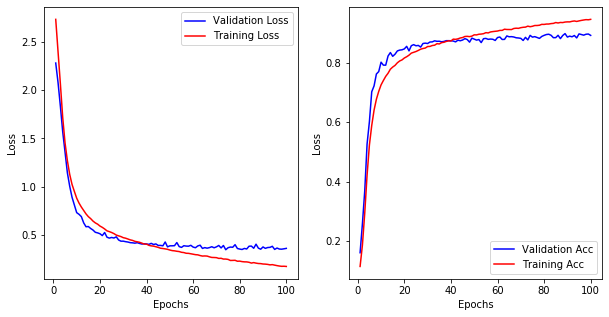

In [0]:
NN_val_loss = history.history['val_loss']
NN_train_loss = history.history['loss']
NN_val_acc = history.history['val_acc']
NN_train_acc = history.history['acc']


epochs = range(1,101)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, NN_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, NN_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, NN_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, NN_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Build the network again different architecture


*   Introduce an additional convolution layer
*   Increase the dimension of the filter of the first layer of the NN
*   Add drop out before flattening to reduce dimension and prevent overfitting




In [0]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = (32, 32, 1), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3, 3)))


model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3, 3)))

model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.4))


model.add(Dense(128, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.4))


model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [0]:
adam = optimizers.adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history=model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))

Train on 34020 samples, validate on 4200 samples
Epoch 1/100
34020/34020 [==============================] - 7s 214us/step - loss: 0.5304 - acc: 0.8402 - val_loss: 0.4916 - val_acc: 0.8569
Epoch 2/100
34020/34020 [==============================] - 1s 28us/step - loss: 0.3784 - acc: 0.8826 - val_loss: 0.4099 - val_acc: 0.8748
Epoch 3/100
34020/34020 [==============================] - 1s 29us/step - loss: 0.3882 - acc: 0.8786 - val_loss: 0.4451 - val_acc: 0.8733
Epoch 4/100
34020/34020 [==============================] - 1s 29us/step - loss: 0.3549 - acc: 0.8883 - val_loss: 0.4261 - val_acc: 0.8714
Epoch 5/100
34020/34020 [==============================] - 1s 29us/step - loss: 0.3470 - acc: 0.8925 - val_loss: 0.4225 - val_acc: 0.8719
Epoch 6/100
34020/34020 [==============================] - 1s 29us/step - loss: 0.3355 - acc: 0.8950 - val_loss: 0.3731 - val_acc: 0.8924
Epoch 7/100
34020/34020 [==============================] - 1s 29us/step - loss: 0.3312 - acc: 0.8980 - val_loss: 0.4318 - 

In [0]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

3780/3780 [==============================] - 0s 103us/step
Test accuracy:  0.9095238095238095


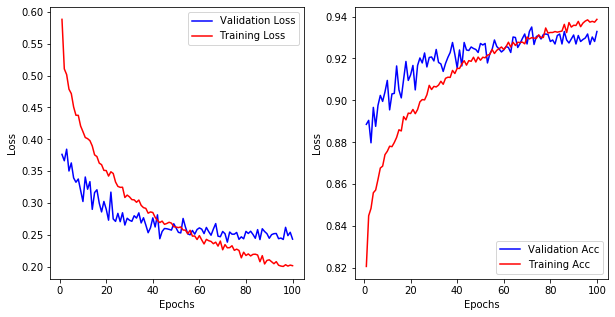

In [0]:
NN_val_loss = history.history['val_loss']
NN_train_loss = history.history['loss']
NN_val_acc = history.history['val_acc']
NN_train_acc = history.history['acc']


epochs = range(1,101)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, NN_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, NN_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, NN_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, NN_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Best results achieved so far with an accuracy of 91% on validation data.

#Lets Try adding data augmentation to see if the performance improves any further

In [14]:
ds=h5py.File('/content/drive/My Drive/Colab Notebooks/AIML/ANN/Project SVNH - NN & DL/SVHN_single_grey1.h5','r')

X_train = ds['X_train'][:]
y_train = ds['y_train'][:]
X_test = ds['X_test'][:]
y_test = ds['y_test'][:]

# Close this file
ds.close()
from keras.utils import to_categorical

# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=1, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, random_state=1, test_size=0.1)

X_train.shape, X_test.shape , X_val.shape,y_train.shape, y_test.shape, y_val.shape

((34020, 32, 32),
 (3780, 32, 32),
 (4200, 32, 32),
 (34020, 10),
 (3780, 10),
 (4200, 10))

In [0]:
X_train=X_train.reshape((34020,32,32,1))
X_train=X_train.astype('float32')/255

X_test=X_test.reshape((3780,32,32,1))
X_test=X_test.astype('float32')/255

X_val=X_val.reshape((4200,32,32,1))
X_val=X_val.astype('float32')/255

In [0]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = (32, 32, 1), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3, 3)))


model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3, 3)))


model.add(Flatten())

model.add(Dense(512, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.2))


model.add(Dense(256, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.1))


model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

adam = optimizers.adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
 
batch_size = 256
epochs = 100
datagen = ImageDataGenerator(rescale=1./255,
        zoom_range=0.1, # randomly zoom into images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
  
# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_val, y_val),
                              workers=4)

Epoch 1/100
133/133 [==============================] - 21s 161ms/step - loss: 1.8650 - acc: 0.3318 - val_loss: 11.3260 - val_acc: 0.2807
Epoch 2/100
133/133 [==============================] - 11s 85ms/step - loss: 1.2284 - acc: 0.5865 - val_loss: 11.4187 - val_acc: 0.2833
Epoch 3/100
133/133 [==============================] - 12s 91ms/step - loss: 1.0538 - acc: 0.6452 - val_loss: 11.9896 - val_acc: 0.2502
Epoch 4/100
133/133 [==============================] - 12s 90ms/step - loss: 0.9692 - acc: 0.6779 - val_loss: 12.3609 - val_acc: 0.2281
Epoch 5/100
133/133 [==============================] - 12s 90ms/step - loss: 0.8911 - acc: 0.7049 - val_loss: 12.4025 - val_acc: 0.2238
Epoch 6/100
133/133 [==============================] - 12s 90ms/step - loss: 0.8291 - acc: 0.7244 - val_loss: 11.6846 - val_acc: 0.2679
Epoch 7/100
133/133 [==============================] - 12s 92ms/step - loss: 0.7956 - acc: 0.7377 - val_loss: 10.5659 - val_acc: 0.3314
Epoch 8/100
133/133 [==========================

In [0]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

3780/3780 [==============================] - 0s 102us/step
Test accuracy:  0.5425925925925926


#Try Ensemble of CNN


In [0]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

#Build 7 Convolutional Neural Networks!

In [12]:
nets = 7
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (32, 32, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




#Architectural highlights


The CNNs in this kernel follow LeNet5's design (pictured above) with the following improvements:

Two stacked 3x3 filters replace the single 5x5 filters. These become nonlinear 5x5 convolutions
A convolution with stride 2 replaces pooling layers. These become learnable pooling layers.
ReLU activation replaces sigmoid.
Batch normalization is added
Dropout is added
More feature maps (channels) are added
An ensemble of 15 CNNs with bagging is used
Experiments (here) show that each of these changes improve classification accuracy.

In [17]:
# DECREASE LEARNING RATE EACH EPOCH

from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 10 # changed from 45 to 10

for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, y_train, test_size = 0.1)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


CNN 1: Epochs=10, Train accuracy=0.90793, Validation accuracy=0.93886
CNN 2: Epochs=10, Train accuracy=0.90630, Validation accuracy=0.94092
CNN 3: Epochs=10, Train accuracy=0.90450, Validation accuracy=0.94327
CNN 4: Epochs=10, Train accuracy=0.90695, Validation accuracy=0.94092
CNN 5: Epochs=10, Train accuracy=0.90338, Validation accuracy=0.94562
CNN 6: Epochs=10, Train accuracy=0.90293, Validation accuracy=0.93710
CNN 7: Epochs=10, Train accuracy=0.90132, Validation accuracy=0.94503


In [0]:
import pandas as pd

In [0]:
# ENSEMBLE PREDICTIONS AND SUBMIT
results = np.zeros( (X_test.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(X_test)
results = np.argmax(results,axis = 1)


In [34]:
X_train = ds['X_train'][:]
y_train = ds['y_train'][:]
X_test = ds['X_test'][:]
y_test = ds['y_test'][:]

# Close this file
ds.close()
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=1, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, random_state=1, test_size=0.1)

X_train.shape, X_test.shape , X_val.shape,y_train.shape, y_test.shape, y_val.shape

((34020, 32, 32), (3780, 32, 32), (4200, 32, 32), (34020,), (3780,), (4200,))

In [29]:
results

array([1, 1, 1, ..., 3, 9, 0])

In [35]:
y_test

array([6, 1, 1, ..., 3, 9, 0], dtype=uint8)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(results, y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       391
           1       0.94      0.93      0.93       396
           2       0.96      0.97      0.97       379
           3       0.94      0.95      0.94       388
           4       0.97      0.93      0.95       392
           5       0.97      0.96      0.96       374
           6       0.91      0.96      0.93       355
           7       0.98      0.96      0.97       383
           8       0.92      0.96      0.94       364
           9       0.94      0.96      0.95       358

    accuracy                           0.95      3780
   macro avg       0.95      0.95      0.95      3780
weighted avg       0.95      0.95      0.95      3780



In [0]:
#Best Results achived with Ensemble